In [16]:
%config IPCompleter.greedy=True

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing as pp
from sklearn.metrics import silhouette_score

In [18]:
creditcard_df = pd.read_csv("/Users/rahulkashyap/Downloads/Data Science Content /Learnbay course content/K means/CC GENERAL.csv")

In [19]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
creditcard_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [21]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']>1400.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
11,C10012,630.794744,0.818182,1492.18,1492.18,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,2000.0,705.618627,155.549069,0.000000,12
12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,C18987,1042.816735,0.625000,3950.00,3950.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,3150.0,6274.982741,303.462882,0.000000,8
8758,C18997,1812.542545,0.857143,2918.08,2918.08,0.00,0.000000,0.571429,0.571429,0.000000,0.000000,0,5,3000.0,247.249275,297.395431,0.000000,7
8801,C19041,275.020950,1.000000,1943.00,1943.00,0.00,0.000000,0.600000,0.600000,0.000000,0.000000,0,9,500.0,1438.120632,142.241273,0.555556,10
8843,C19084,751.590839,0.444444,2000.00,2000.00,0.00,0.000000,0.111111,0.111111,0.000000,0.000000,0,1,2000.0,265.918137,353.102768,0.000000,9


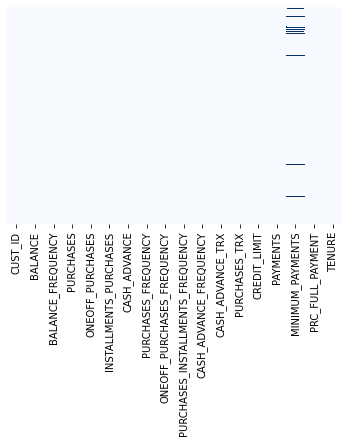

In [22]:
# check for missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [23]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [24]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].median()

In [25]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].median()

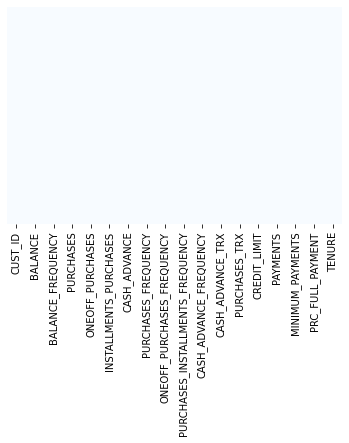

In [26]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [27]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [28]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [29]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


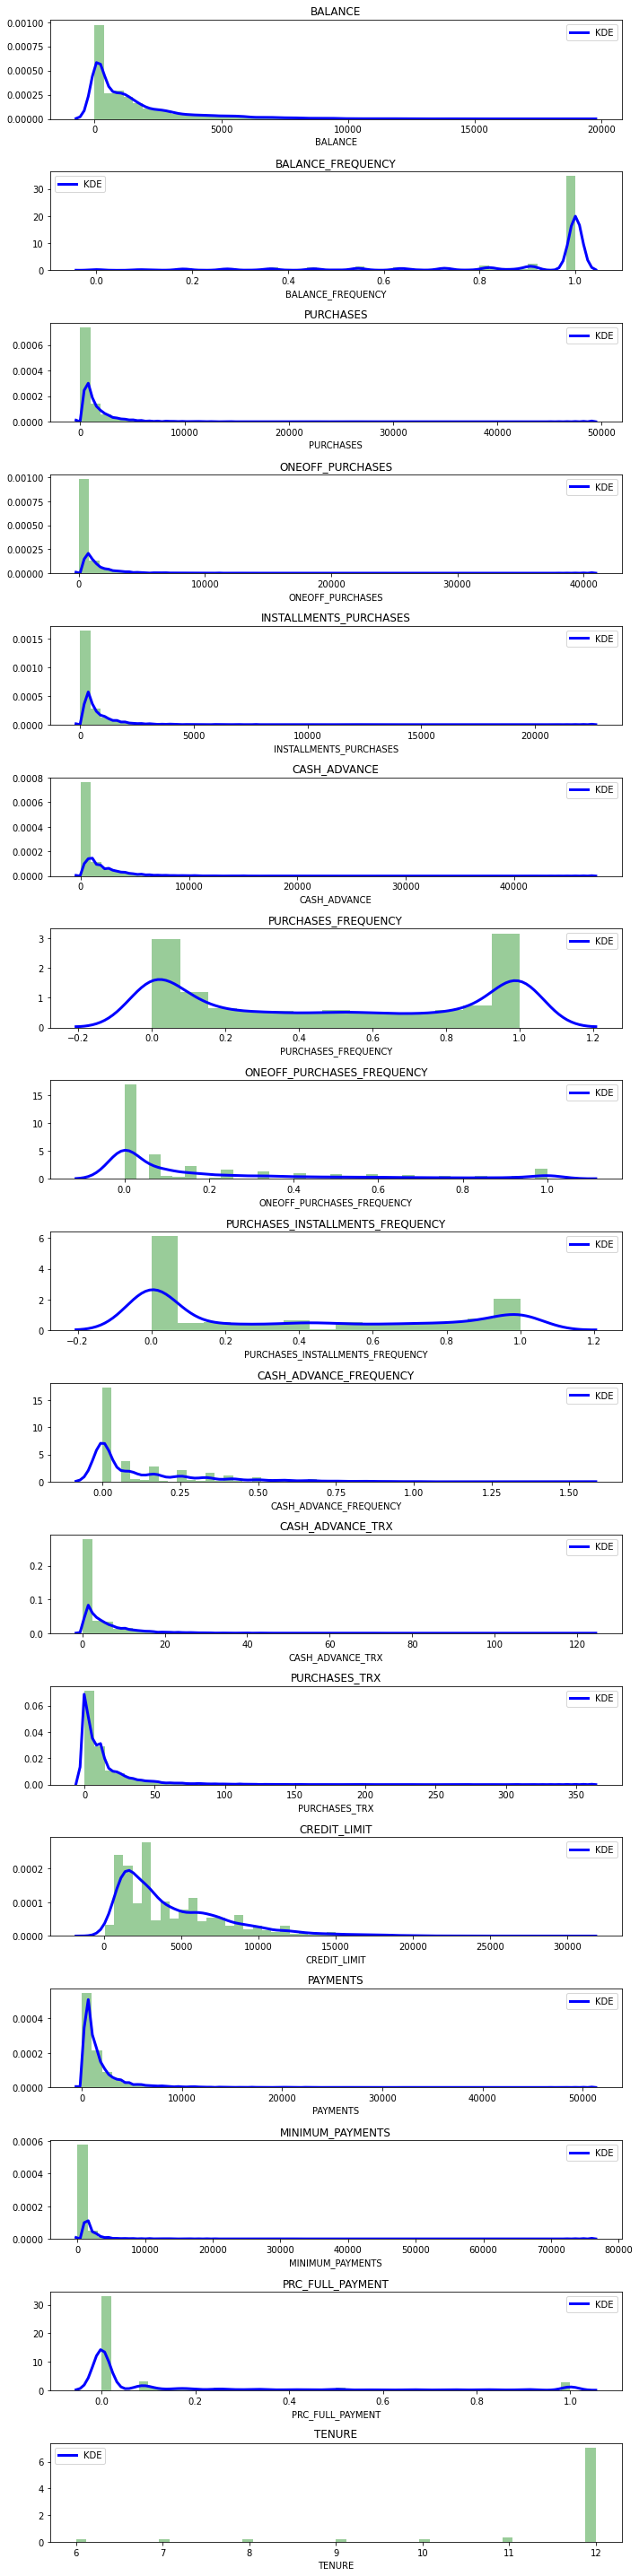

In [30]:
# Univariate analysis

plt.figure(figsize=(10,40))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()  


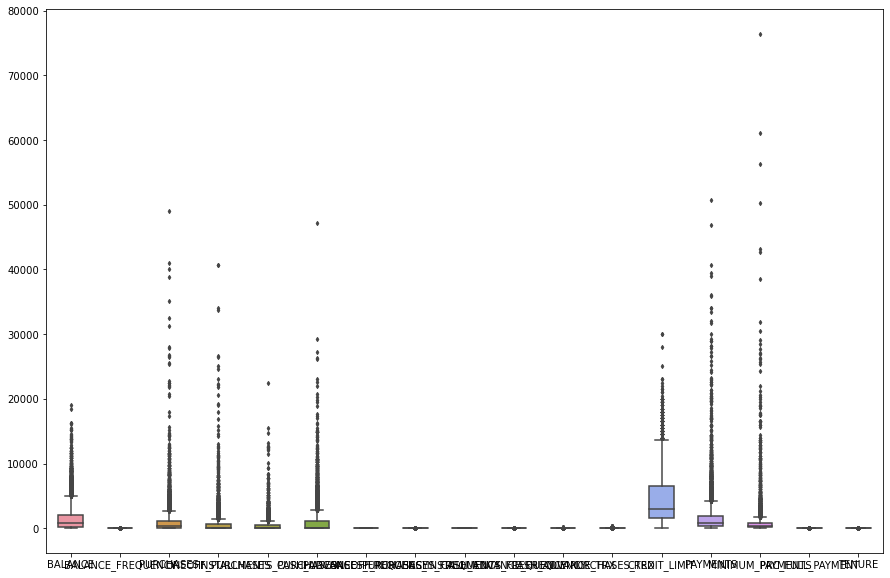

In [31]:
# Check for outliers
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = creditcard_df,width=0.5,ax=ax,fliersize=3)

In [32]:
creditcard_df.shape

(8950, 17)

In [37]:
# Use z scores to remove outliers
z = np.abs(stats.zscore(creditcard_df))
creditcard_df_new = creditcard_df[(z < 3).all(axis=1)]

In [38]:
creditcard_df_new.shape

(7434, 17)

In [14]:
z.shape

(8950, 17)

In [39]:
correlations = creditcard_df.corr()

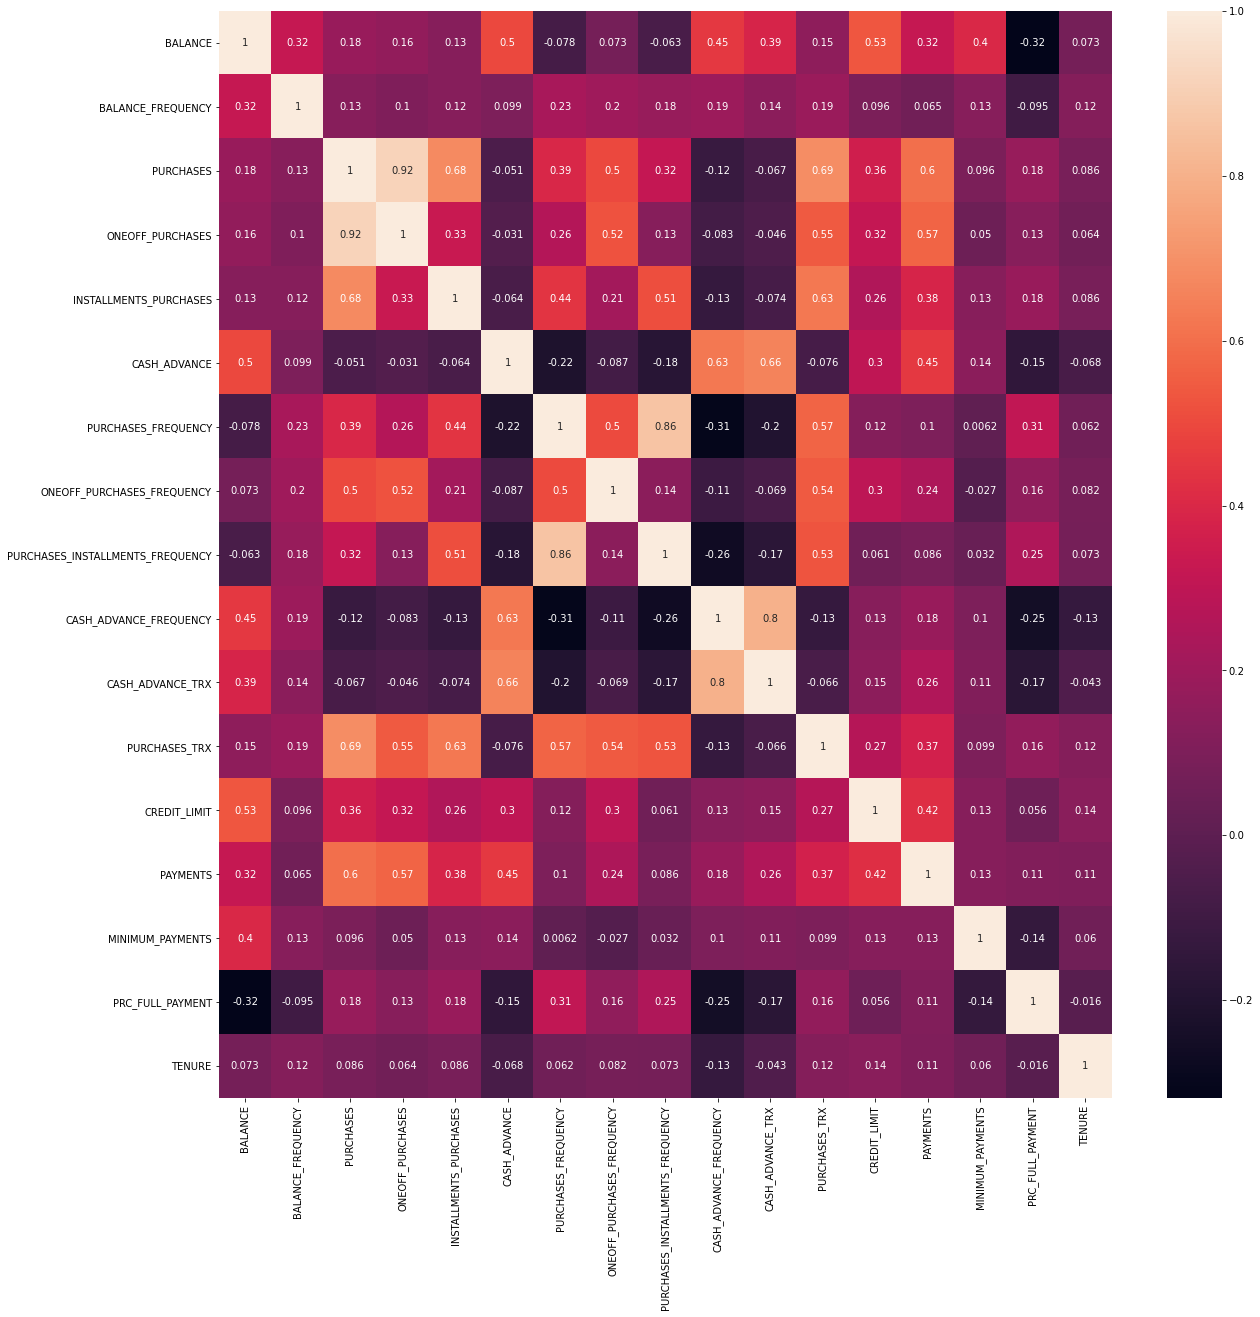

In [22]:
# Visualise correlations

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [42]:
creditcard_df_transformed = creditcard_df_new

In [28]:
# Log-transformation - This is optional 

#cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

# Note: Adding 1 for each value to avoid inf values
#creditcard_df_transformed[cols] = np.log(1 + creditcard_df_transformed[cols])

#creditcard_df_transformed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,12
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12


In [43]:
# Standardize data
scaler = pp.StandardScaler() 
creditcard_df_scaled = scaler.fit_transform(creditcard_df_transformed) 
  
# Normalizing the Data 
normalized_df = pp.normalize(creditcard_df_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,-0.027026,0.013920,-0.042302,-0.034893,-0.030990,-0.034476,-0.019265,-0.027610,-0.014834,-0.026875,-0.031729,-0.036176,-0.037203,-0.044959,-0.029301,-0.026544,0.025394
std,0.239254,0.271923,0.208457,0.207249,0.226597,0.221126,0.287098,0.250252,0.288824,0.252112,0.226601,0.223999,0.267969,0.221542,0.207028,0.252503,0.212490
min,-0.452296,-0.878609,-0.355266,-0.363863,-0.366396,-0.357833,-0.515054,-0.447738,-0.516494,-0.454412,-0.386338,-0.374279,-0.624530,-0.513763,-0.411532,-0.448247,-0.920672
25%,-0.205002,0.016372,-0.197351,-0.175837,-0.192035,-0.178300,-0.272108,-0.202863,-0.260200,-0.215459,-0.184052,-0.204106,-0.245774,-0.204156,-0.160509,-0.185662,0.060544
50%,-0.088676,0.119404,-0.108511,-0.113400,-0.110532,-0.120917,0.005897,-0.123378,-0.116894,-0.115244,-0.119822,-0.096630,-0.094605,-0.100231,-0.098256,-0.119249,0.087900
75%,0.094023,0.181929,0.078453,0.031477,0.069954,0.045293,0.240487,0.081786,0.235306,0.135988,0.063996,0.077334,0.144409,0.055655,0.037711,0.005338,0.115646
max,0.798808,0.436138,0.645499,0.754880,0.828054,0.873147,0.562275,0.796227,0.669512,0.786173,0.855786,0.834896,0.871908,0.911076,0.975499,0.835604,0.263275


In [44]:
creditcard_df_scaled.view()


array([[-0.80965236, -0.33491067, -0.64144794, ..., -0.56418479,
        -0.53152321,  0.31218731],
       [ 1.27327162,  0.09112689, -0.73448727, ...,  0.63748261,
         0.2326373 ,  0.31218731],
       [ 0.80727139,  0.51716446,  0.01955068, ...,  0.06416447,
        -0.53152321,  0.31218731],
       ...,
       [-0.26386232, -0.65444001, -0.73448727, ..., -0.30850755,
        -0.53152321, -4.6976356 ],
       [-0.74584887,  0.51716446, -0.30439979, ..., -0.5833401 ,
        -0.53152321, -4.6976356 ],
       [-0.61848108, -0.65444001, -0.65529656, ..., -0.47973622,
        -0.53152321, -4.6976356 ]])

Text(0, 0.5, 'Silhouette Score')

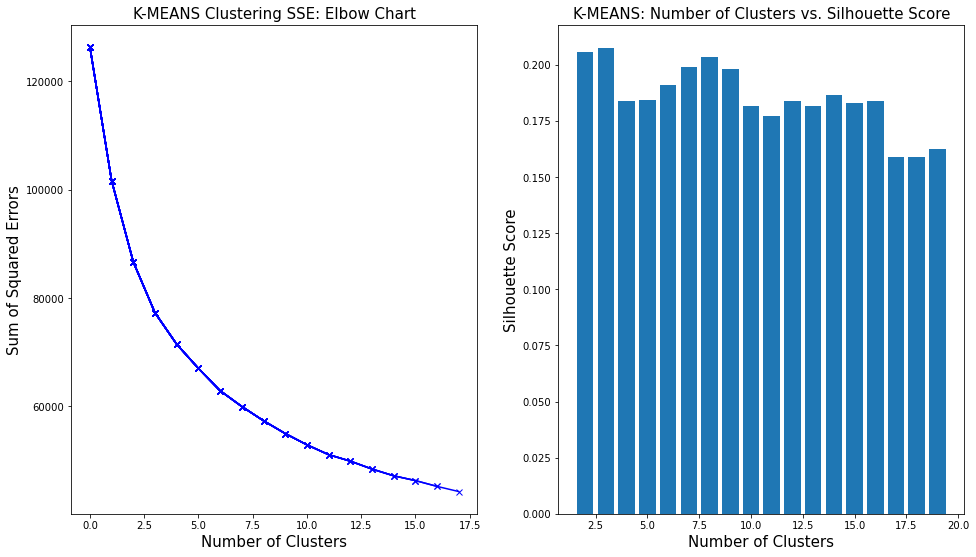

In [45]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1) #elbow chart
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart

n_clusters=19
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(creditcard_df_scaled)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')


silhouette_scores = [] 

for n_cluster in range(2, 20):
    silhouette_scores.append( 
        silhouette_score(creditcard_df_scaled, KMeans(n_clusters = n_cluster).fit_predict(creditcard_df_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15)

In [69]:
# Build the KMeans model
kmeans = KMeans(5,random_state=6)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [47]:
labels


array([0, 2, 1, ..., 0, 0, 0], dtype=int32)

In [59]:
kmeans.cluster_centers_.shape

(4, 17)

In [70]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.021474,0.400819,-0.482071,-0.271458,-0.551357,-0.186416,-0.725899,-0.223170,-0.729098,-0.006065,-0.119856,-0.567778,-0.322211,-0.339152,-0.003907,-0.462236,0.033337
1,-0.449194,0.294870,0.062666,-0.325668,0.638421,-0.446506,1.008623,-0.248851,1.147375,-0.516496,-0.462723,0.388891,-0.249960,-0.264124,-0.151962,0.432330,-0.005897
2,0.172803,0.375272,1.895725,1.852704,0.935756,-0.286090,1.045122,1.714373,0.607513,-0.341571,-0.305839,1.625026,0.811802,0.931808,0.023308,0.348868,0.181518
3,-0.764351,-2.131974,-0.418788,-0.285824,-0.400443,-0.329196,-0.545109,-0.381270,-0.458715,-0.485299,-0.420387,-0.515699,-0.162899,-0.282472,-0.551620,0.377881,-0.131736
4,1.308107,0.333366,-0.416835,-0.292000,-0.387248,1.760308,-0.609397,-0.308812,-0.519298,1.692021,1.750300,-0.449159,0.535241,0.600693,0.782837,-0.432429,-0.103390


In [71]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1302.426540,0.975174,258.820997,215.871326,43.137332,441.686941,0.198055,0.128160,0.071250,0.108715,1.842172,3.473485,3053.682660,810.407258,574.442626,0.020149,11.777357
1,588.022446,0.952566,817.379243,172.855307,645.139429,120.410510,0.885486,0.120774,0.807957,0.027675,0.491005,17.937566,3265.788974,918.177346,459.510014,0.280294,11.746032
2,1532.121104,0.969723,2696.948002,1901.411594,795.584636,318.563634,0.899952,0.685397,0.596006,0.055447,1.109252,36.626969,6382.806908,2636.016273,595.568502,0.256022,11.895669
3,109.661722,0.434720,323.709253,204.472070,119.496919,265.317311,0.269706,0.082691,0.177403,0.032628,0.657845,4.260870,3521.374234,891.821667,149.263721,0.264460,11.645558
4,3255.342281,0.960781,325.712367,199.571225,126.172879,2846.380060,0.244228,0.103530,0.153618,0.378315,9.212066,5.266910,5570.906044,2160.402557,1185.175788,0.028817,11.668190


In [117]:
labels.shape

(7434,)

In [118]:
labels.max()

3

In [119]:
labels.min()

0

In [72]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0


In [63]:
creditcard_df_cluster_cluster2=creditcard_df_cluster[creditcard_df_cluster['cluster']==1.0]

In [73]:
pd.crosstab(index=creditcard_df_cluster['cluster'], columns='count')

col_0,count
cluster,
0.0,2375
1.0,1890
2.0,1016
3.0,1057
4.0,1096


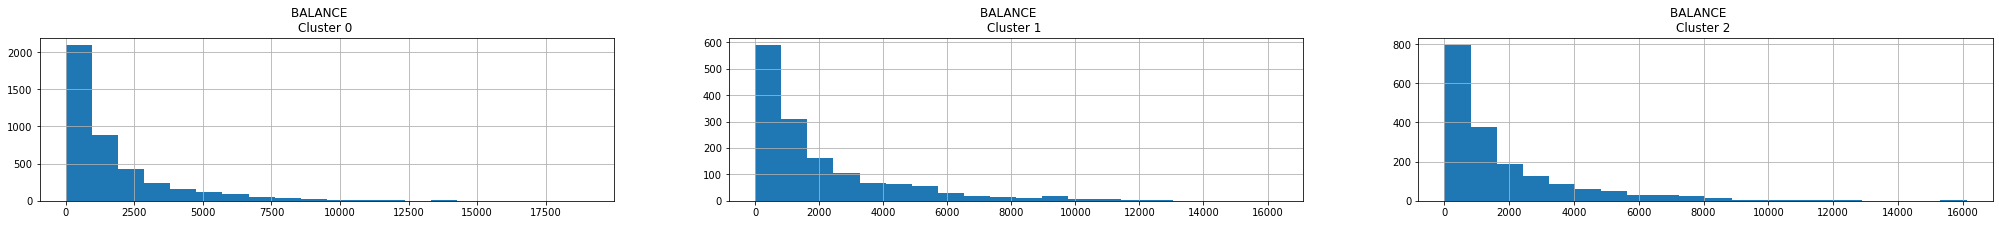

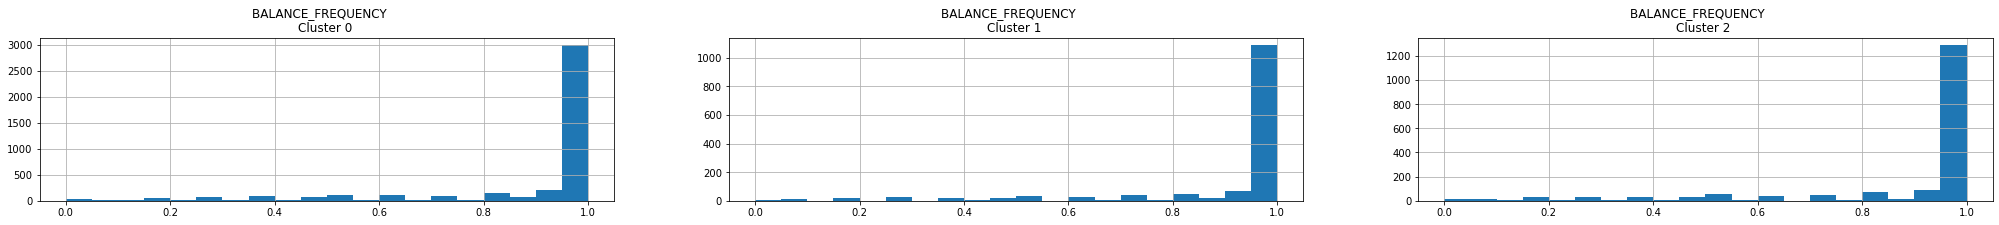

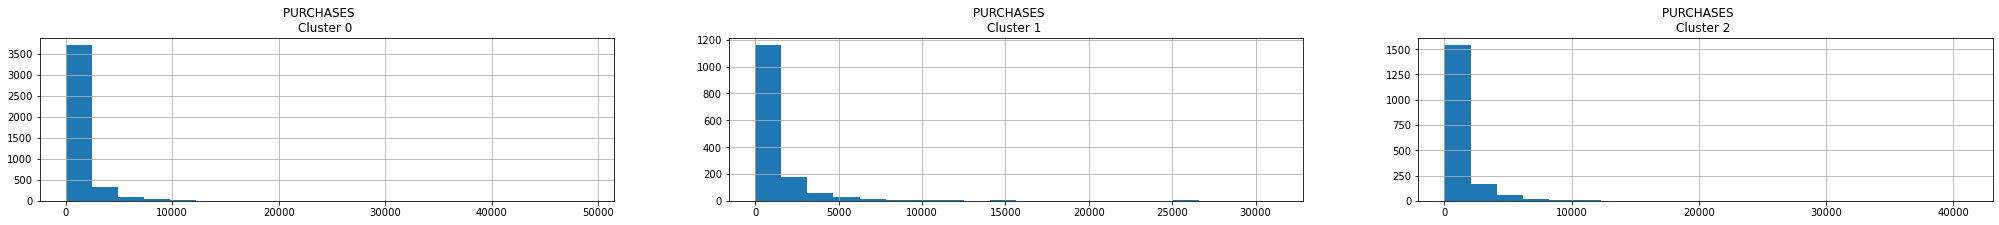

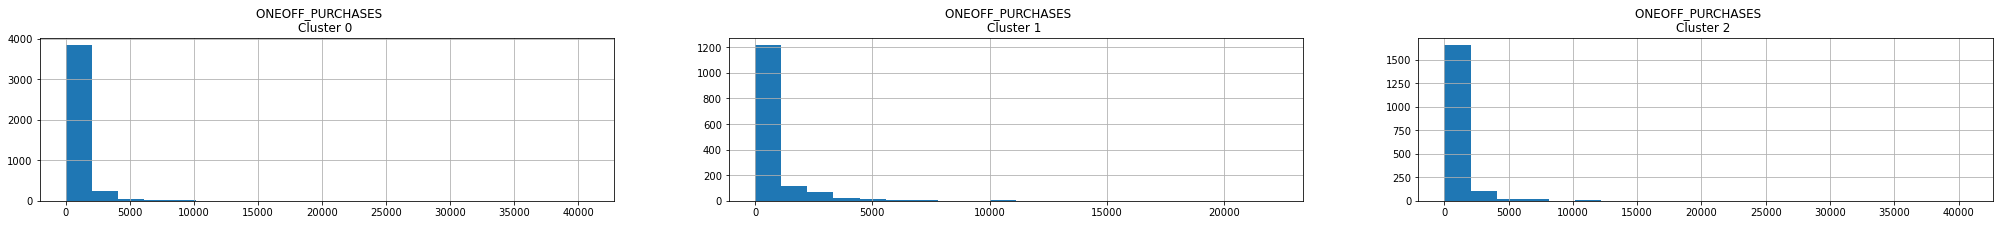

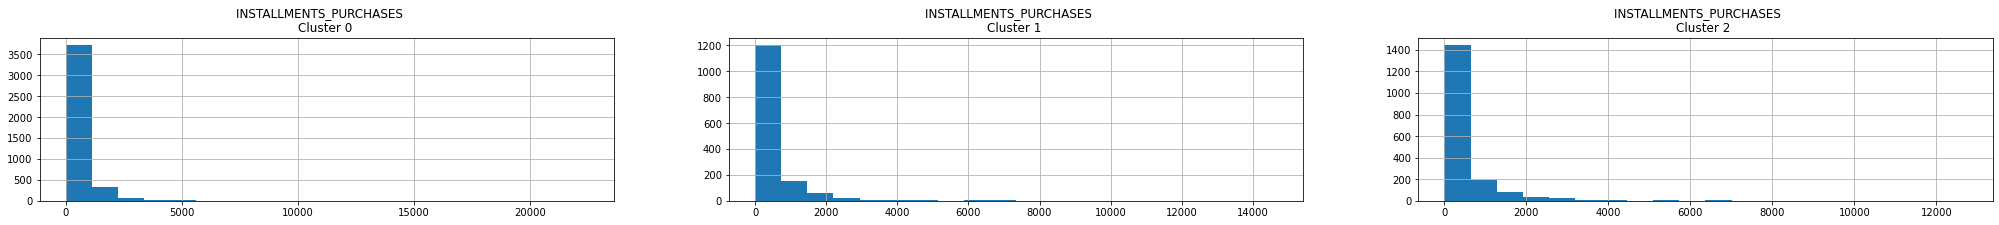

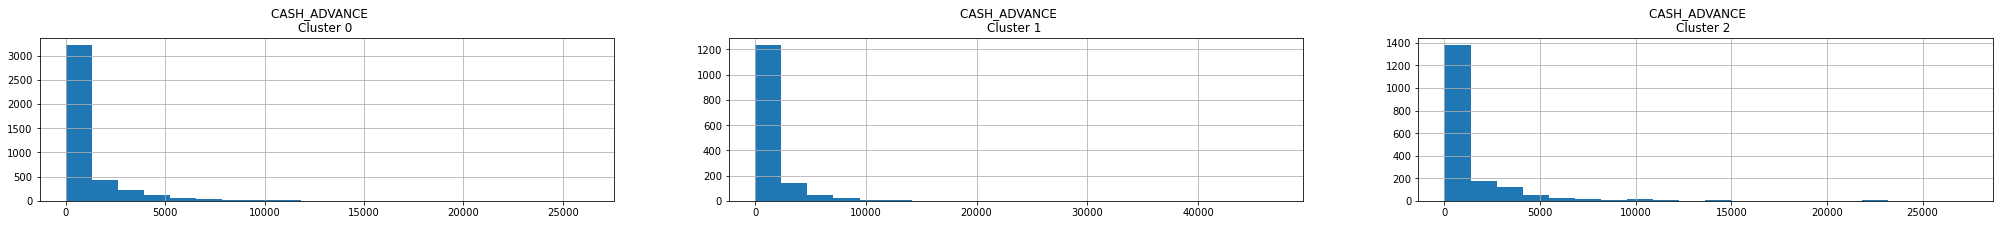

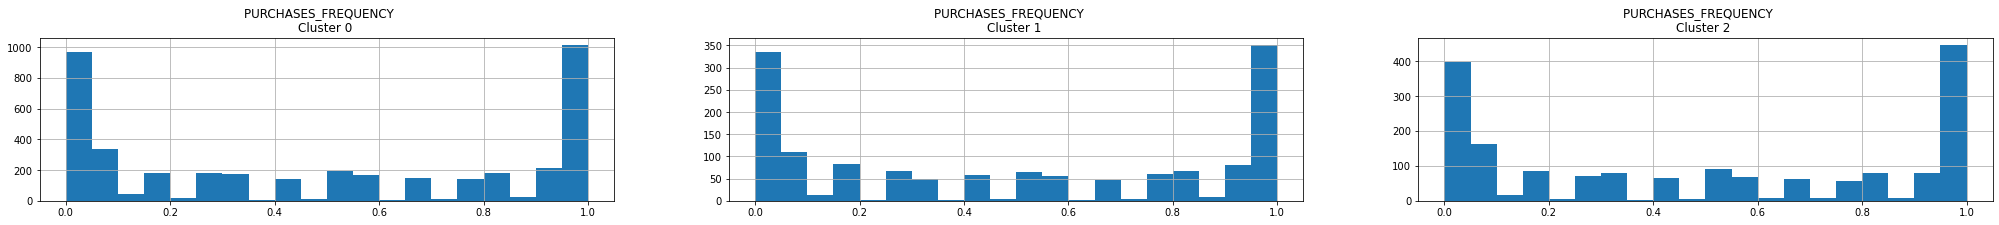

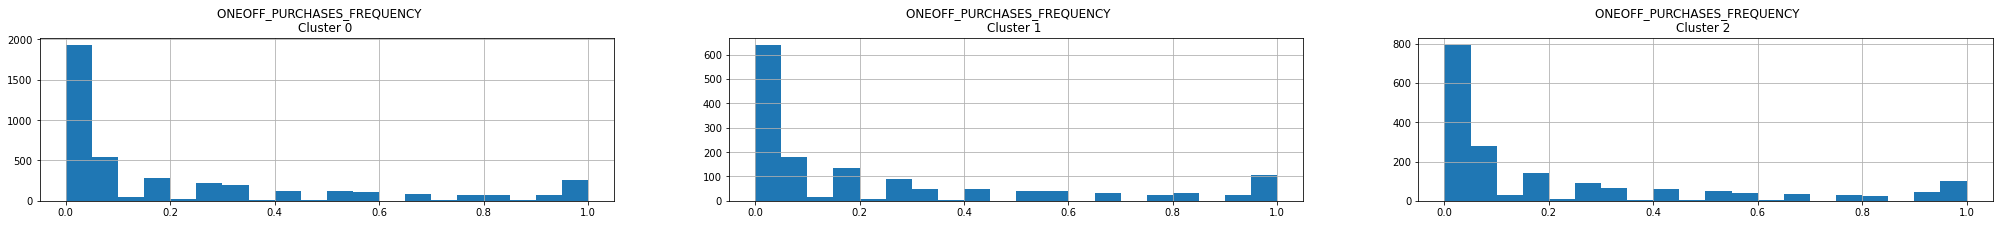

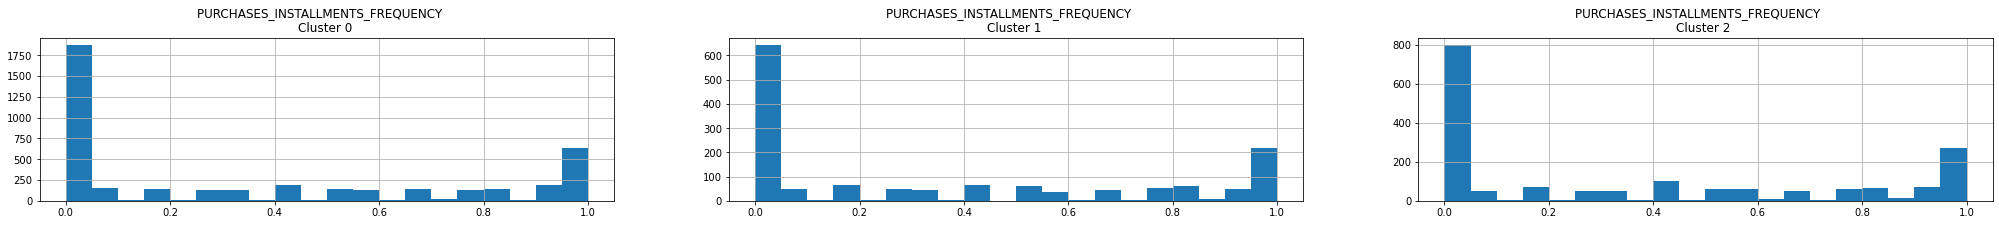

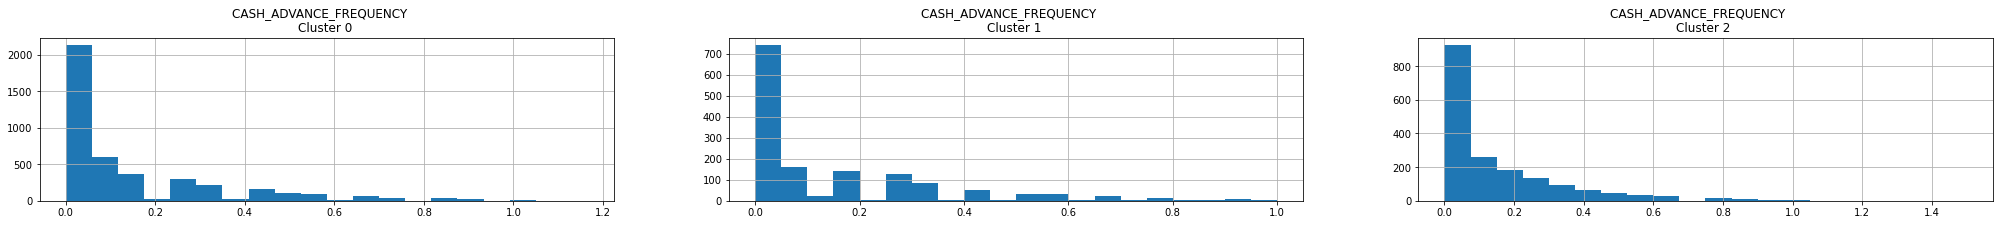

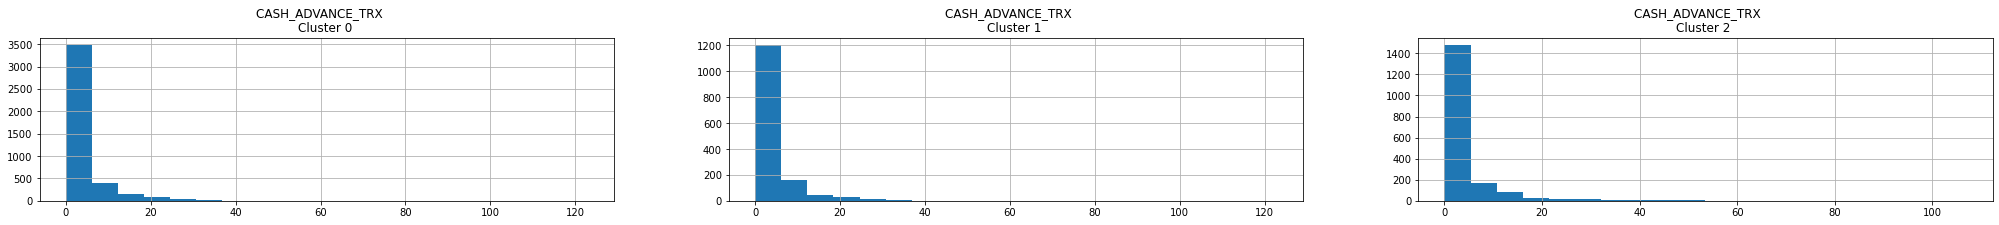

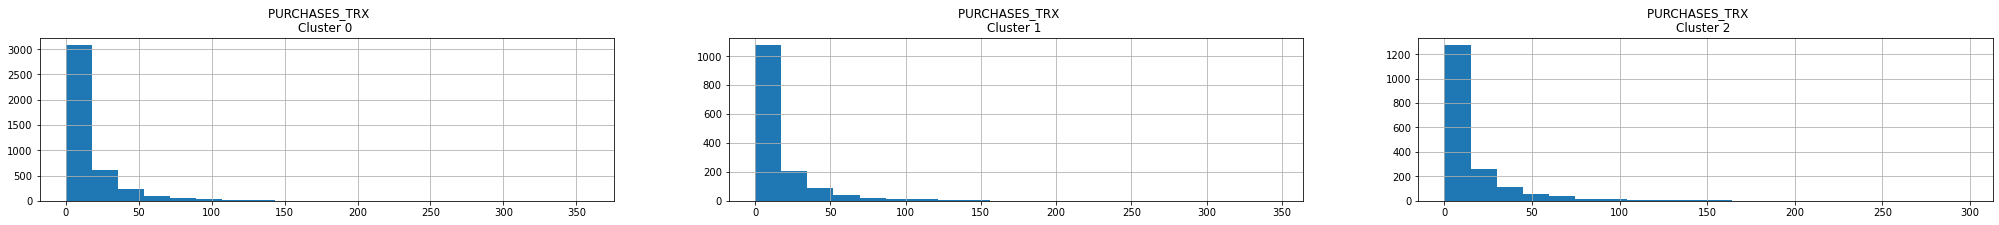

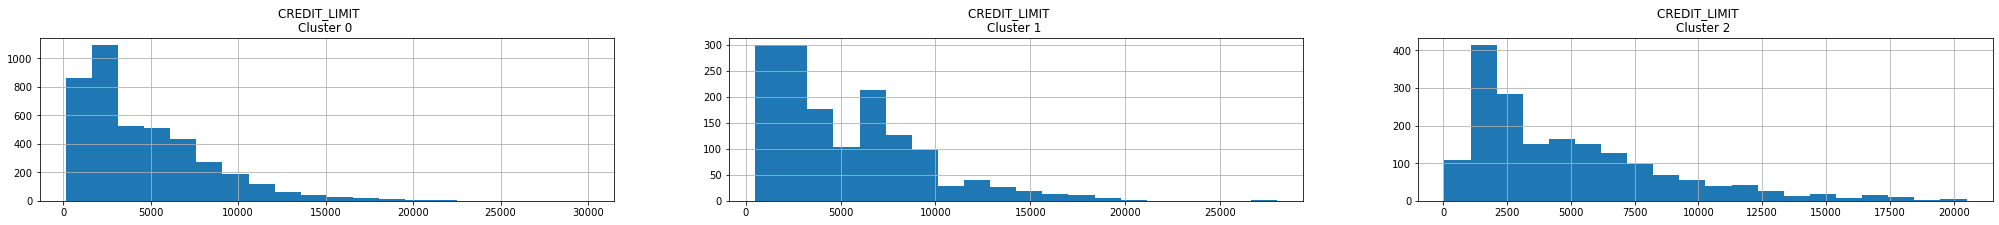

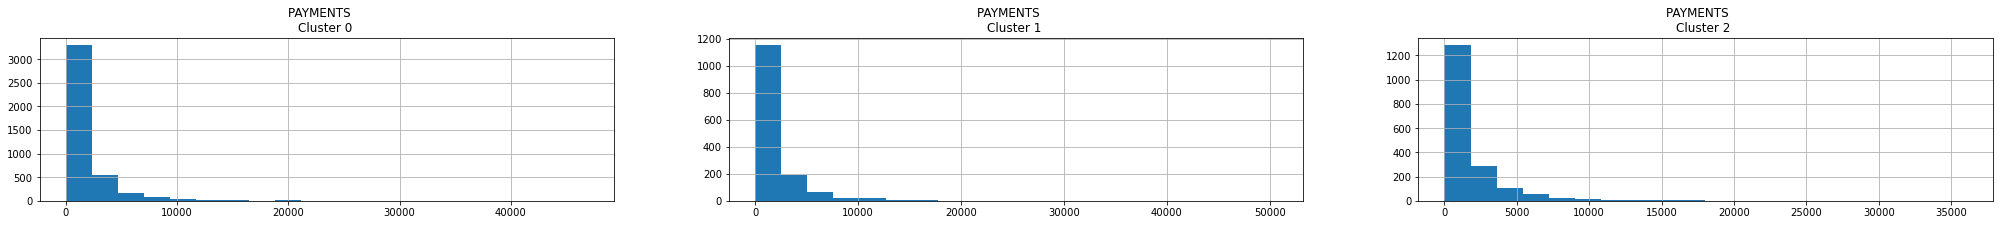

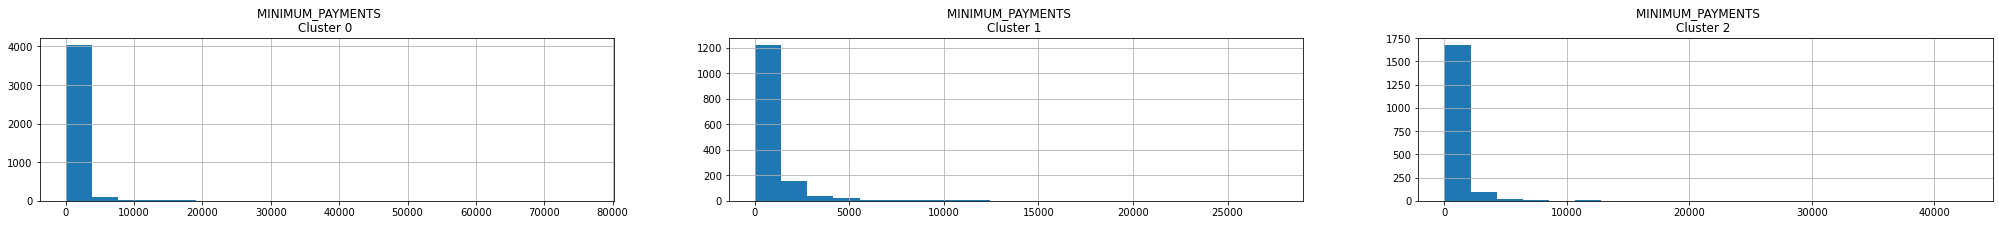

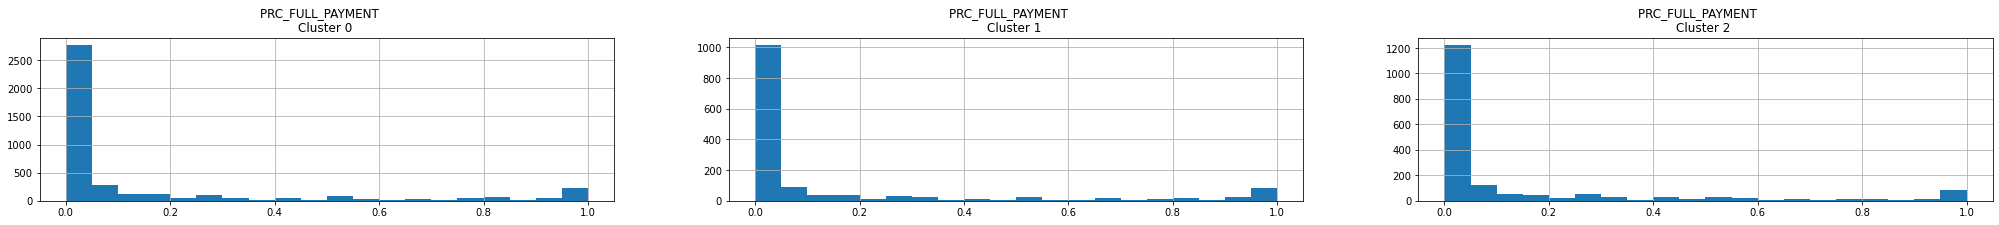

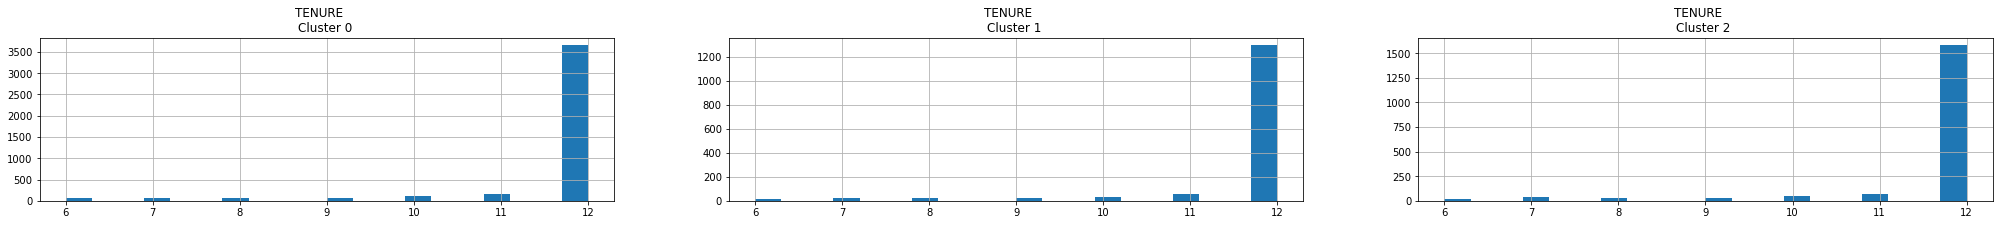

In [106]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 3))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


In [123]:
# PCA to  visualise clusters 
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.33076839, -2.04007821,  0.19425017, -0.63908892,  0.05783569],
       [-2.77605981,  3.32009148,  0.44887787,  1.49983748, -1.85784422],
       [ 1.23811969,  0.54320945,  1.46701697, -2.06848134,  0.48147664],
       ...,
       [-2.5782975 , -1.13257113,  0.46321193,  1.52788121,  2.81566172],
       [-0.12165913, -1.94873902, -1.11680869,  1.13972654,  3.19403446],
       [-2.5196919 , -0.86900912,  0.50264935,  1.94463802,  3.53751065]])

In [125]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2','pca3','pca4','pca5'])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5
0,-1.330768,-2.040078,0.194250,-0.639089,0.057836
1,-2.776060,3.320091,0.448878,1.499837,-1.857844
2,1.238120,0.543209,1.467017,-2.068481,0.481477
3,-0.574576,-0.219448,1.978095,-0.780477,-0.681344
4,-1.452052,-1.461353,0.261806,-1.155366,0.203182


In [126]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,cluster
0,-1.330768,-2.040078,0.194250,-0.639089,0.057836,1
1,-2.776060,3.320091,0.448878,1.499837,-1.857844,0
2,1.238120,0.543209,1.467017,-2.068481,0.481477,2
3,-0.574576,-0.219448,1.978095,-0.780477,-0.681344,1
4,-1.452052,-1.461353,0.261806,-1.155366,0.203182,1


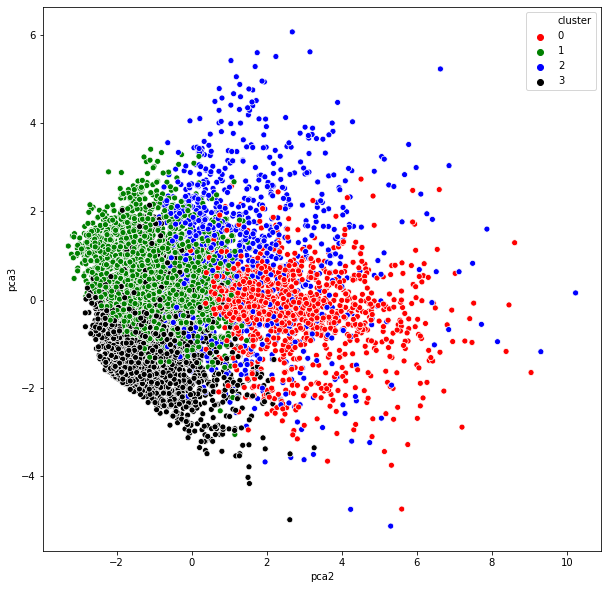

In [129]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca2", y="pca3", hue = "cluster", data = pca_df, palette =['red','green','blue','black'])
plt.show()

In [128]:
pca.explained_variance_ratio_

array([0.28961421, 0.2039698 , 0.09548324, 0.07690998, 0.06315273])

In [ ]:
pca.components_